In [2]:
#### Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Functions.Preprocess import tracks_to_df

In [3]:
#### Parameters
max_ev = 50000
sort = False
PT_cut = [-1000, 1000]
n_constits=1
rinv1probv1_path = "Data/from_cluster/1.10.20/dark_test.50000.0.0.0.75.0.1000.root.GetTracks.txt"
rinv1probv2_path = "Data/from_cluster/1.10.20/dark_test.50000.0.0.0.50.0.1000.root.GetTracks.txt"
rinv1probv3_path = "Data/from_cluster/1.10.20/dark_test.50000.0.0.0.00.50.1000.root.GetTracks.txt"
rinv1probv4_path = "Data/from_cluster/1.10.20/dark_test.50000.0.0.1.00.50.1000.root.GetTracks.txt"
rinv2probv1_path = "Data/from_cluster/1.10.20/dark_test.50000.0.5.0.75.0.1000.root.GetTracks.txt"
rinv2probv2_path = "Data/from_cluster/1.10.20/dark_test.50000.0.5.0.50.0.1000.root.GetTracks.txt"

In [4]:
%%time
rinv1probv1 = tracks_to_df(rinv1probv1_path, label=1, max_ev=max_ev, n_constits=n_constits, trunc=False, PT_cut=PT_cut, sort=sort) 
rinv1probv2 = tracks_to_df(rinv1probv2_path, label=1, max_ev=max_ev, n_constits=n_constits, trunc=False, PT_cut=PT_cut, sort=sort) 
rinv1probv3 = tracks_to_df(rinv1probv3_path, label=1, max_ev=max_ev, n_constits=n_constits, trunc=False, PT_cut=PT_cut, sort=sort) 
rinv1probv4 = tracks_to_df(rinv1probv4_path, label=1, max_ev=max_ev, n_constits=n_constits, trunc=False, PT_cut=PT_cut, sort=sort) 
rinv2probv1 = tracks_to_df(rinv2probv1_path, label=1, max_ev=max_ev, n_constits=n_constits, trunc=False, PT_cut=PT_cut, sort=sort) 
rinv2probv2 = tracks_to_df(rinv2probv2_path, label=1, max_ev=max_ev, n_constits=n_constits, trunc=False, PT_cut=PT_cut, sort=sort) 
rinv1probv1["track_mult"] = rinv1probv1.track_PT.map(lambda x: len(x))
rinv1probv2["track_mult"] = rinv1probv2.track_PT.map(lambda x: len(x))
rinv1probv3["track_mult"] = rinv1probv3.track_PT.map(lambda x: len(x))
rinv1probv4["track_mult"] = rinv1probv4.track_PT.map(lambda x: len(x))
rinv2probv1["track_mult"] = rinv2probv1.track_PT.map(lambda x: len(x))
rinv2probv2["track_mult"] = rinv2probv2.track_PT.map(lambda x: len(x))

Wall time: 1min 35s


In [4]:
print(len(rinv1probv1), len(rinv1probv2), len(rinv2probv1), len(rinv2probv2))

86555 86566 81698 82102


## Comparison of ProV=0 amd ProbV=1

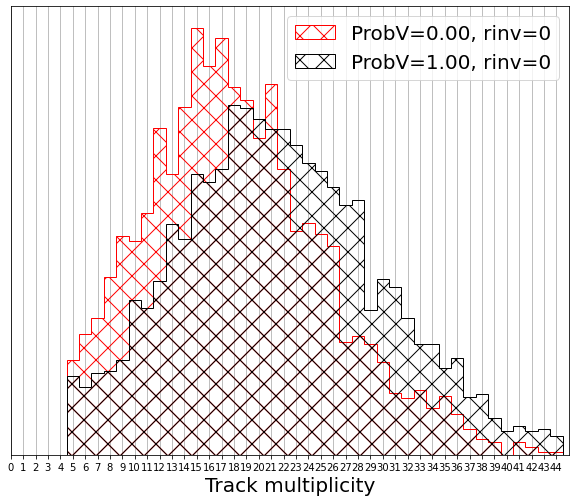

In [69]:
# Track multiplicity distribution with a generation level 150 < PT < 300 cut
ptmin = 100
ptmax = 110
rinv1probv3.track_mult[(rinv1probv3.jet_PT>ptmin)&(rinv1probv3.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='red')
rinv1probv4.track_mult[(rinv1probv4.jet_PT>ptmin)&(rinv1probv4.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='black')
plt.xticks(np.arange(0, 45))
plt.xlim([0, 45])
plt.yticks([])
plt.gcf().set_size_inches(10, 8.25)
plt.xlabel("Track multiplicity", fontsize="20")
plt.legend(["ProbV=0.00, rinv=0", "ProbV=1.00, rinv=0"], fontsize=20);
plt.savefig("ProbV_hist_compare")

# Explained by multiplicity as function of PT

In [35]:
rinv2probv2.head()

,Event,Jet,jet_PT,jet_Eta,jet_Phi,track_PT,track_Eta,track_Phi,track_D0,track_DZ,abs_D0,label,track_mult
0,1,1,118.1220,-1.45161,1.057400,"[4.79226, 2.77229, 1.60309, 1.11503, 0.90479, ...","[-1.40095, -1.24409, -0.976802, -1.1697, -1.27...","[1.17686, 1.37567, 1.43738, 0.558703, 0.786936...","[0.640556, 0.172021, 0.126647, -0.214275, 0.06...","[-0.0888904, 0.00898716, -0.443217, -0.33157, ...","[0.640556, 0.172021, 0.126647, 0.214275, 0.064...",1,27
1,1,2,206.9460,-0.02386,-1.940070,"[1.68622, 0.986011, 0.323246, 5.96049, 2.07692...","[0.170765, 0.359256, 0.0856162, -0.0524611, -0...","[-1.59194, -1.67453, -2.41676, -1.70613, -1.50...","[0.0918546, -0.0298618, 0.0694585, -0.012617, ...","[-0.0326945, 0.000931829, -0.073888, 0.0640755...","[0.0918546, 0.0298618, 0.0694585, 0.012617, 0....",1,18
2,2,1,36.2433,1.31183,2.567840,"[2.64349, 1.44031, 0.630646, 0.513937, 3.08448...","[0.852038, 1.65636, 1.29533, 1.21105, 1.75921,...","[2.90279, 2.4133, 2.95457, 3.10552, 2.45673, 2...","[-0.0466247, 0.238098, 0.169941, 0.17466, -0.0...","[-0.192029, 0.221754, -0.209119, -0.162058, 0....","[0.0466247, 0.238098, 0.169941, 0.17466, 0.022...",1,11
3,2,2,60.6591,1.86958,-0.871775,"[1.86597, 8.65708, 0.266677, 0.239314, 1.94189...","[1.76309, 1.76243, 1.38769, 2.21828, 1.77808, ...","[-1.07484, -0.818671, -1.10573, -1.0577, -1.12...","[0.222317, 0.0266799, 0.163933, -0.358405, -0....","[0.448153, -0.112351, 0.13939, -2.00245, 1.612...","[0.222317, 0.0266799, 0.163933, 0.358405, 0.34...",1,19
4,4,1,52.0490,1.00900,-0.365024,"[8.17513, 8.16969, 2.40679, 8.21356, 0.937854,...","[1.04964, 1.06423, 0.890331, 1.06682, 0.963766...","[-0.343667, -0.370851, -0.99, -0.51526, -0.617...","[0.00629401, 0.0842732, -0.0781912, -0.0247206...","[-0.02079, 0.0779877, -0.0590104, -0.0227147, ...","[0.00629401, 0.0842732, 0.0781912, 0.0247206, ...",1,10


c:\users\noamw\desktop\jet_tagging\venv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  import sys
c:\users\noamw\desktop\jet_tagging\venv\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


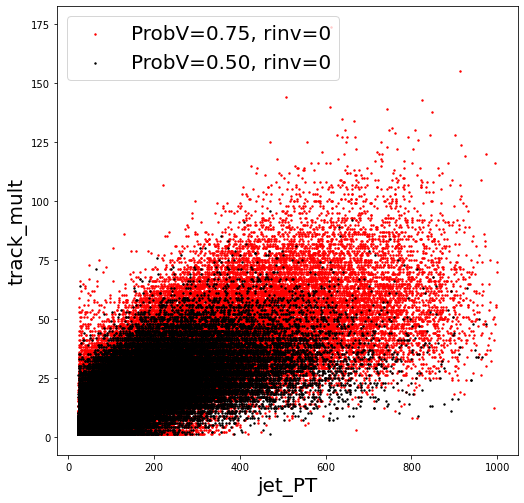

In [76]:
ax = rinv1probv1.plot.scatter('jet_PT', 'track_mult', s=2, c='red', fontsize=10)
rinv2probv1.plot.scatter('jet_PT', 'track_mult', s=2, ax=ax, c='black', fontsize=10)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.gcf().set_size_inches(8.25, 8.25)
plt.legend(["ProbV=0.75, rinv=0", "ProbV=0.50, rinv=0"], fontsize=20);
plt.savefig("ProbV_compare3")

## ProbV comparison for rinv=0

0.10990699555196118


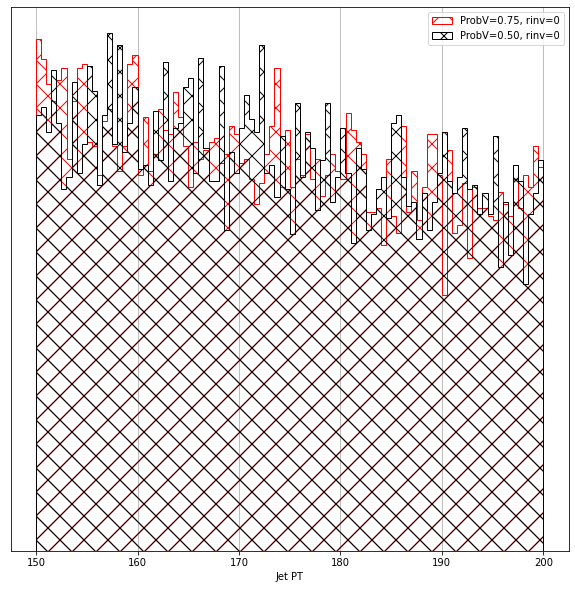

In [41]:
# PT distribution with a generation level 150 < PT < 300 cut
PT_range = (150, 200)
rinv1probv1.jet_PT[rinv1probv1.jet_PT.between(*PT_range)].hist(bins=100, density=True, histtype='step', hatch='x', color='red')
rinv1probv2.jet_PT[rinv1probv2.jet_PT.between(*PT_range)].hist(bins=100, density=True, histtype='step', hatch='x', color='black')
plt.legend(["ProbV=0.75, rinv=0", "ProbV=0.50, rinv=0"])
plt.yticks([])
plt.xlabel("Jet PT")
plt.gcf().set_size_inches(10, 10)
print(rinv1probv1.jet_PT.between(*PT_range).sum()/len(rinv1probv1))

In [22]:
rinv1probv1.jet_PT.between(*PT_range).size

86555

In [27]:
rinv1probv1.describe()

,Event,Jet,jet_PT,jet_Eta,jet_Phi,label,track_mult
count,86555.000000,86555.000000,86555.000000,86555.000000,86555.000000,86555.0,86555.000000
mean,25093.625972,1.478297,217.373308,-0.000267,0.001209,1.0,28.017330
std,14400.114485,0.499532,183.740000,1.458081,1.811932,0.0,18.327523
min,1.000000,1.000000,22.764000,-3.172140,-3.141500,1.0,1.000000
25%,12705.500000,1.000000,74.635650,-1.140805,-1.565720,1.0,14.000000
50%,25100.000000,1.000000,161.117000,-0.010240,-0.002925,1.0,25.000000
75%,37598.500000,2.000000,305.630000,1.142460,1.574800,1.0,38.000000
max,49998.000000,2.000000,998.932000,3.181130,3.141400,1.0,174.000000


In [10]:
PT_range = (150, 300)
*PT_range

SyntaxError: can't use starred expression here (<ipython-input-10-0d86eb42d480>, line 5)

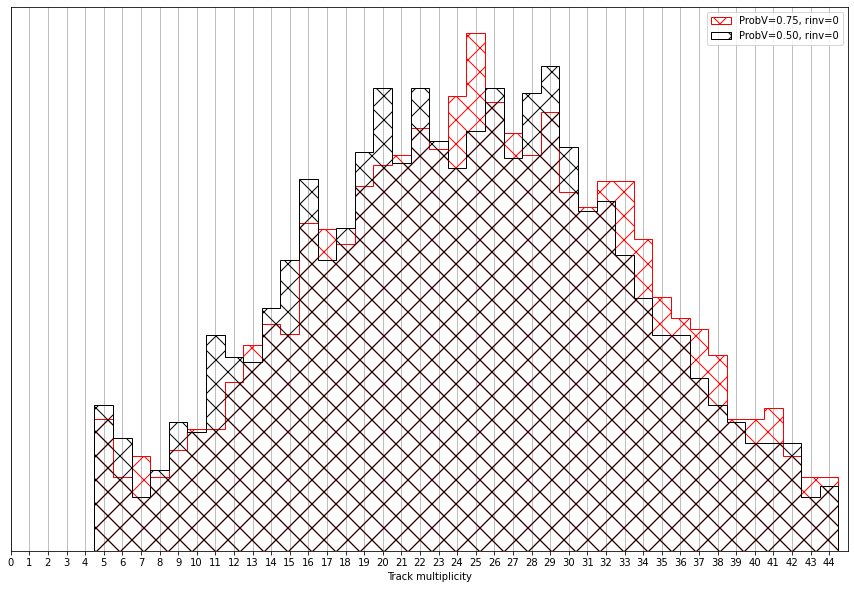

In [15]:
# Track multiplicity distribution with a generation level 150 < PT < 300 cut
ptmin = 150
ptmax = 160
rinv1probv1.track_mult[(rinv1probv1.jet_PT>ptmin)&(rinv1probv1.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='red')
rinv1probv2.track_mult[(rinv1probv2.jet_PT>ptmin)&(rinv1probv2.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='black')
plt.legend(["ProbV=0.75, rinv=0", "ProbV=0.50, rinv=0"])
plt.xticks(np.arange(0, 45))
plt.xlim([0, 45])
plt.yticks([])
plt.xlabel("Track multiplicity")
plt.gcf().set_size_inches(15, 10)

# rinv comparison for ProbV=0.75

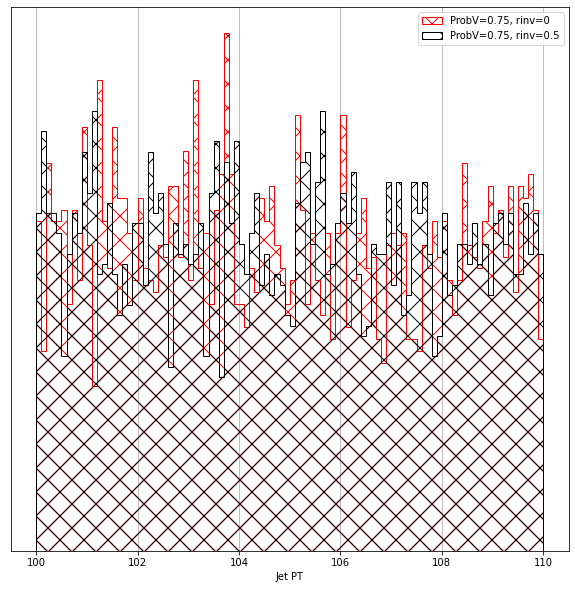

In [7]:
# PT distribution with a generation level 150 < PT < 300 cut
rinv1probv1.jet_PT.hist(range=[100,110], bins=100, density=True, histtype='step', hatch='x', color='red')
rinv2probv1.jet_PT.hist(range=[100,110], bins=100, density=True, histtype='step', hatch='x', color='black')
plt.legend(["ProbV=0.75, rinv=0", "ProbV=0.75, rinv=0.5"])
plt.yticks([])
plt.xlabel("Jet PT")
plt.gcf().set_size_inches(10, 10)

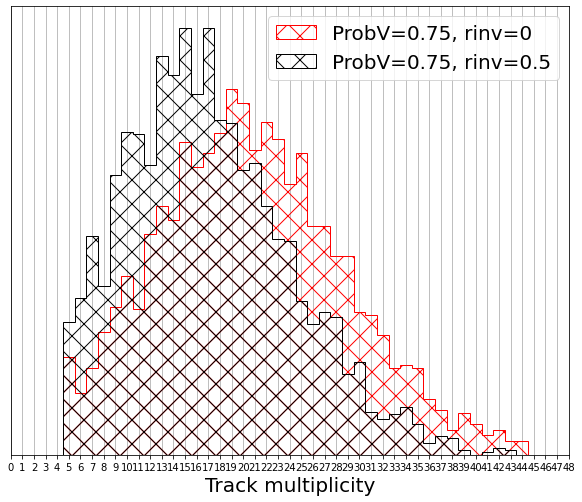

In [74]:
# Track multiplicity distribution with a generation level 150 < PT < 300 cut
ptmin = 100
ptmax = 110
rinv1probv1.track_mult[(rinv1probv1.jet_PT>ptmin)&(rinv1probv1.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='red')
rinv2probv1.track_mult[(rinv2probv1.jet_PT>ptmin)&(rinv2probv1.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='black')
plt.legend(["ProbV=0.75, rinv=0", "ProbV=0.75, rinv=0.5"])
plt.xticks(np.arange(0, 49))
plt.yticks([])
plt.gcf().set_size_inches(10, 8.25)
plt.xlabel("Track multiplicity", fontsize="20")
plt.legend(["ProbV=0.75, rinv=0", "ProbV=0.75, rinv=0.5"], fontsize=20);
plt.savefig("ProbV_hist_compare_2")

# Both effects

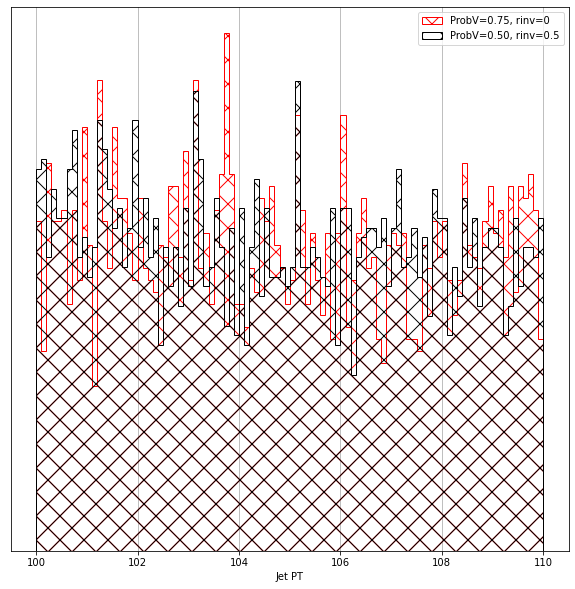

In [9]:
# PT distribution with a generation level 150 < PT < 300 cut
rinv1probv1.jet_PT.hist(range=[100,110], bins=100, density=True, histtype='step', hatch='x', color='red')
rinv2probv2.jet_PT.hist(range=[100,110], bins=100, density=True, histtype='step', hatch='x', color='black')
plt.legend(["ProbV=0.75, rinv=0", "ProbV=0.50, rinv=0.5"])
plt.yticks([])
plt.xlabel("Jet PT")
plt.gcf().set_size_inches(10, 10)

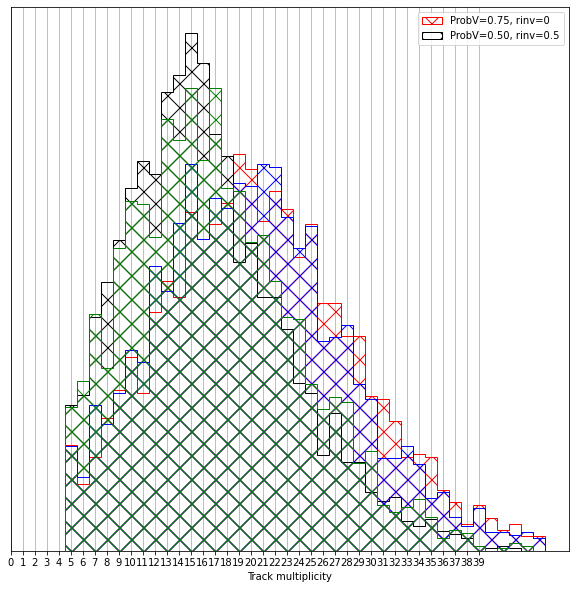

In [29]:
# Track multiplicity distribution with a generation level 150 < PT < 300 cut
ptmin = 100
ptmax = 110
rinv1probv1.track_mult[(rinv1probv1.jet_PT>ptmin)&(rinv1probv1.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='red')
rinv2probv2.track_mult[(rinv2probv2.jet_PT>ptmin)&(rinv2probv2.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='black')
rinv1probv2.track_mult[(rinv1probv2.jet_PT>ptmin)&(rinv1probv2.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='blue')
rinv2probv1.track_mult[(rinv2probv1.jet_PT>ptmin)&(rinv2probv1.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='green')
plt.legend(["ProbV=0.75, rinv=0", "ProbV=0.50, rinv=0.5"])
plt.xticks(np.arange(0, 40))
plt.yticks([])
plt.xlabel("Track multiplicity")
plt.gcf().set_size_inches(10, 10)

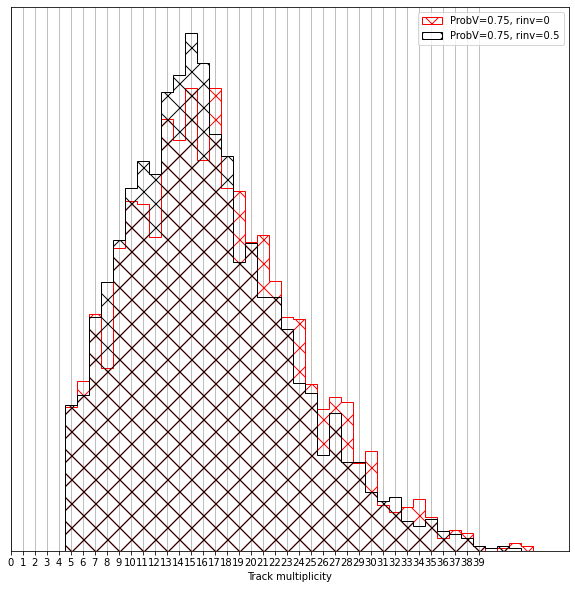

In [11]:
# Track multiplicity distribution with a generation level 150 < PT < 300 cut
ptmin = 100
ptmax = 110
rinv2probv1.track_mult[(rinv2probv1.jet_PT>ptmin)&(rinv2probv1.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='red')
rinv2probv2.track_mult[(rinv2probv2.jet_PT>ptmin)&(rinv2probv2.jet_PT<ptmax)].hist(bins=np.arange(4.5, 45, 1), density=True, histtype='step', hatch='x', color='black')
plt.legend(["ProbV=0.75, rinv=0", "ProbV=0.75, rinv=0.5"])
plt.xticks(np.arange(0, 40))
plt.yticks([])
plt.xlabel("Track multiplicity")
plt.gcf().set_size_inches(10, 10)

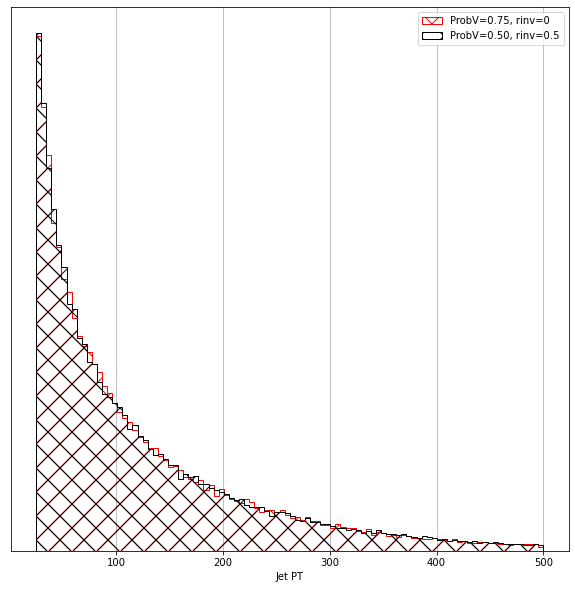

In [12]:
# PT distribution with a generation level 150 < PT < 300 cut
rinv2probv1.jet_PT.hist(range=[25,500], bins=100, density=True, histtype='step', hatch='x', color='red')
rinv2probv2.jet_PT.hist(range=[25,500], bins=100, density=True, histtype='step', hatch='x', color='black')
plt.legend(["ProbV=0.75, rinv=0", "ProbV=0.50, rinv=0.5"])
plt.yticks([])
plt.xlabel("Jet PT")
plt.gcf().set_size_inches(10, 10)